# 3-1 神經網路的核心元件

In [0]:
from keras import layers  #從 keras 套件中匯入 layers 模組
layers = layers.Dense(32, input_shape=(784,))  #使用 layers 模組中的 Dense 類別, 建立一個有 32 輸出單元的密集層, 其輸入端的第 0 軸為批次維度, 此處未指定, 因此可輸入任何維度(數量)的批次量, 第 1 軸則為 784 維

Using TensorFlow backend.


In [0]:
from keras import models  #從 keras 套件中匯入 models 模組
from keras import layers  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的 layer 可以進行堆疊

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784, )))
model.add(layers.Dense(32))  #第 2 層就不用指定 input_shape 了

Instructions for updating:
Colocations handled automatically by placer.


# 3-2 Keras 簡介

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))  #用 model 物件的 add 方法, 新增一個輸入為 784 維、輸出為 32 維 (等同於 unit 的數量), 並使用 relu 啟動函數的輸入層和隱藏層 (Keras 的最開頭一層具有一般神經網路輸入層和隱藏層的功能, 詳細請參考 3-1-1 節的小編補充, 將在後續 3-4-3 節開始實作)
model.add(layers.Dense(10, activation='softmax'))  #用 model 物件的 add 方法, 新增輸出為 10 維 (10 unit), 並使用 softmax 啟動函數的輸出層

In [0]:
input_tensor = layers.Input(shape=(784, ))  #建立一個 input_tensor 物件, 輸入層 shape為 784 維的張量
x = layers.Dense(32, activation='relu')(input_tensor)  #建立 x 物件, 使用 input_tensor 物件, 並使用 relu 啟動函數輸出一個 32 維張量的輸入層
output_tensor = layers.Dense(10, activation='softmax')(x)  #建立 model 物件, 使用 models.Model 方法, 且輸入層為 input_tensor 物件, 輸出層為 output_tensor 物件
model = models.Model(inputs=input_tensor, outputs=output_tensor)  #建立一個 output_tensor 物件, 使用 x 物件, 並使用 softmax 啟動函數輸出一個 10 維張量的輸出層

In [0]:
from keras import optimizers  #從 keras 套件中匯入optimizers 模組

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #使用 model.compile 方法, 對訓練模型進行設定。使用 RMSProp 優化器並將學習率定為 0.001
              loss='mse',  #使用 mean_squared_error 損失函數
              metrics=['accuracy'])  #量測時使用 accuracy 準確度評估模型

In [0]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)  #使用 model.fit() 進行訓練, 傳入輸入資料、標籤資料 (標準答案)、一次訓練週期所使用的資料筆數 batch_size、和訓練週期次數 epochs

# 3-4 分類電影評論：二元分類範例

### 程式 3.1 載入 IMDB 資料集

In [0]:
from keras.datasets import imdb  #從 keras.datasets 套件中匯入 imdb 資料

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(
    num_words=10000)  #從 imdb 中讀取, 只有在訓練集當中最常用的前 10,000 個單字才會被載入, 分別存入 (訓練資料, 訓練標籤) 和 (測試資料, 測試標籤)

In [0]:
train_data[0]  #取第 0 篇評論

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]  #第 0 篇評論的評價

1

In [0]:
max([max(sequence) for sequence in test_data])  #訓練資料的單字索引最大值

9999

### 如何將評論的索引值解碼成英文單字？

In [0]:
word_index = imdb.get_word_index()
print(word_index)

{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 27631, 'snuggled': 408

In [0]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

{34701: 'fawn', 52006: 'tsukino', 52007: 'nunnery', 16816: 'sonja', 63951: 'vani', 1408: 'woods', 16115: 'spiders', 2345: 'hanging', 2289: 'woody', 52008: 'trawling', 52009: "hold's", 11307: 'comically', 40830: 'localized', 30568: 'disobeying', 52010: "'royale", 40831: "harpo's", 52011: 'canet', 19313: 'aileen', 52012: 'acurately', 52013: "diplomat's", 25242: 'rickman', 6746: 'arranged', 52014: 'rumbustious', 52015: 'familiarness', 52016: "spider'", 68804: 'hahahah', 52017: "wood'", 40833: 'transvestism', 34702: "hangin'", 2338: 'bringing', 40834: 'seamier', 34703: 'wooded', 52018: 'bravora', 16817: 'grueling', 1636: 'wooden', 16818: 'wednesday', 52019: "'prix", 34704: 'altagracia', 52020: 'circuitry', 11585: 'crotch', 57766: 'busybody', 52021: "tart'n'tangy", 14129: 'burgade', 52023: 'thrace', 11038: "tom's", 52025: 'snuggles', 29114: 'francesco', 52027: 'complainers', 52125: 'templarios', 40835: '272', 52028: '273', 52130: 'zaniacs', 34706: '275', 27631: 'consenting', 40836: 'snuggle

In [0]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 程式 3.2 將整數 list 編碼成二元矩陣

In [0]:
import numpy as np  #匯入 numpy 模組, 後續程式以 np 使用

def vectorize_sequences(sequences, dimension=10000):  #sequences 將傳入 train_data
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #用 enumerate 取元素值
        results[i, sequence] = 1.   #將 result[i] 特定索引值的數值設定為 1
    return results
    
x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')  #向量化訓練標籤
y_test = np.asarray(test_labels).astype('float32')  #向量化測試標籤

### 程式 3.3 模型定義

In [0]:
from keras import models
from keras import layers

model = models.Sequential()  #使用 models 模組的 Sequential 類別, 建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))  #輸入層
model.add(layers.Dense(16, activation='relu'))  #隱藏層
model.add(layers.Dense(1, activation='sigmoid'))  #輸出層

### 程式 3.4 編譯模型

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  #調整之前的損失函數, 並進行 compile
              metrics=['accuracy'])

### 程式 3.15 調整優化器

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #調整優化器
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 程式 3.6 使用自行定義的損失函數與 metrics 函數

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  #自行指定其他的損失函數與 metrics 函數
              metrics=[metrics.binary_accuracy])


###  程式 3.7 設定驗證資料集

In [0]:
x_val = x_train[:10000]  #取輸入資料的前 10000 個做驗證 (val)
partial_x_train = x_train[10000:]  #輸入資料的第 10000 個開始才是訓練資料
y_val = y_train[:10000]  #對應的, 要取標籤的前 10000 個做為驗證標籤
partial_y_train = y_train[10000:]  #從標籤的第 10000 個開始才是訓練資料的標籤

### 程式 3.8 訓練模型

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  #建立訓練模型

#呼叫 fit() 開始訓練 (使用 partial_x_train 輸入資料、 partial_y_train 標籤、20 個訓練週期、一次訓練週期使用 512 筆資料
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #同時傳入驗證集的資料與標籤

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5051 - acc: 0.7871 - val_loss: 0.3777 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2994 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2175 - acc: 0.9281 - val_loss: 0.3086 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1748 - acc: 0.9438 - val_loss: 0.2826 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1422 - acc: 0.9539 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1148 - acc: 0.9651 - val_loss: 0.3154 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - 

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 程式 3.9 繪製訓練與驗證的損失分數

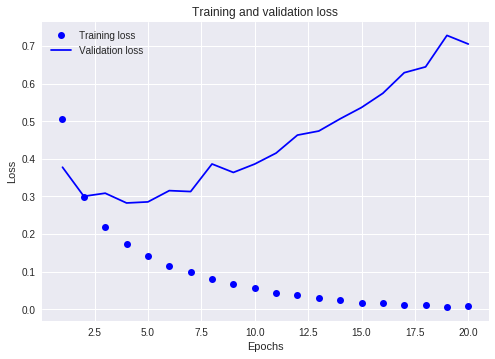

In [0]:
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

### 程式 3.10 繪製訓練和驗證的準確度

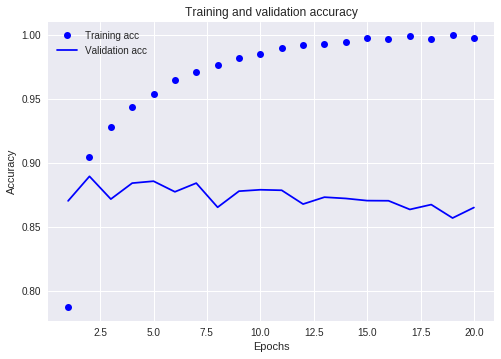

In [0]:
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 程式 3.11 重新開始訓練模型

In [0]:
model = models.Sequential()  #建立模型
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)  #訓練 4 個週期的神經網路
results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估

Epoch 1/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.4739 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2675 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2033 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [0]:
results

[0.31117002926826476, 0.87608]

In [0]:
model.predict(x_test)

array([[0.16204852],
       [0.9998516 ],
       [0.40186763],
       ...,
       [0.08137858],
       [0.04903173],
       [0.45961794]], dtype=float32)

# 3-5 分類數位新聞專欄：多類別分類範例

### 程式 3.12 載入路透社資料集

In [2]:
from keras.datasets import reuters  #從 keras.datasets 套件中匯入 reuters 資料集
(train_data, train_labels),(test_data, test_labels)= reuters.load_data(
    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)for(key, value)in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')for i in
train_data[0]])  #這些索引值有位移 3 個位置, 因為 0, 1 與 2 分別是保留索引值, 代表「填補」、「開始位置」與「未知」

557056/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

### 程式 3.14 將資料加以編碼

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #使用 one-hot 編碼
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))  #把所有元素設為 0
    for i, label in enumerate(labels):
        results[i, label] = 1.   #第 i 個元素設為 1
    return results

one_hot_train_labels = to_one_hot(train_labels)  #向量化訓練標籤
one_hot_test_labels = to_one_hot(test_labels)  #向量化測試標籤

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 程式 3.15 模型定義

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### 程式 3.16 編譯模型

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 程式 3.17 切片驗證資料集

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 程式 3.18 訓練模型

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 196us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9085 - val_acc: 0.8020


### 程式 3.19 繪製訓練和驗證的損失

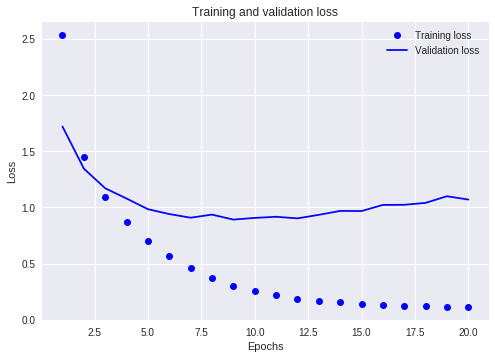

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 程式 3.20 繪製訓練和驗證的準確度

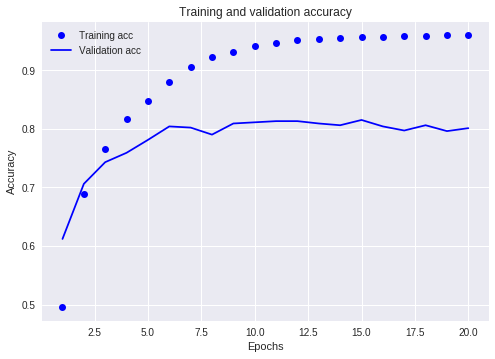

In [0]:
plt.clf()  #先清除畫面

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 程式 3.21 從頭開始重新訓練模型

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,  #9 個週期就好!!!
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 195us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 147us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [0]:
results

[1.022207990036622, 0.7756010686194165]

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)== np.array(test_labels_copy)
float(np.sum(hits_array))/ len(test_labels)

0.182546749777382

### 程式 3.22 對新資料產生預測值

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

1.0

In [0]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 程式 3.23 具有資訊瓶頸的模型

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))  #中間層改為 4 維
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 268us/step - loss: 2.6601 - acc: 0.3767 - val_loss: 1.9693 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 2s 214us/step - loss: 1.6676 - acc: 0.6208 - val_loss: 1.5420 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 2s 214us/step - loss: 1.3345 - acc: 0.6691 - val_loss: 1.3943 - val_acc: 0.6810
Epoch 4/20
7982/7982 [==============================] - 2s 211us/step - loss: 1.1431 - acc: 0.7264 - val_loss: 1.3211 - val_acc: 0.6990
Epoch 5/20
7982/7982 [==============================] - 2s 212us/step - loss: 1.0108 - acc: 0.7459 - val_loss: 1.2678 - val_acc: 0.7030
Epoch 6/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.9090 - acc: 0.7592 - val_loss: 1.2744 - val_acc: 0.7060
Epoch 7/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.8289 - acc: 0.7740 - val_loss: 1.2584 - val_acc: 0.7080


# 3-6 預測房價：迴歸範例

### 程式 3.24 載入波士頓住房價格資料集

In [0]:
from keras.datasets import boston_housing
(train_data, train_targets),(
    test_data, test_targets)=boston_housing.load_data()

In [0]:
train_data.shape  #查看訓練資料 shape

(404, 13)

In [0]:
test_data.shape  #查看測試資料 shape

(102, 13)

In [0]:
train_targets  #訓練資料的標籤

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 程式 3.25 正規化資料

In [0]:
mean = train_data.mean(axis=0)  #沿著第 0 軸 (batch_size 軸) 做平均
train_data -= mean
std = train_data.std(axis=0)  #沿著第 0 軸 (batch_size 軸) 算標準差
train_data /= std

test_data -= mean
test_data /= std

### 程式 3.26 模型定義

In [0]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()  #建構一個 sequential 模型
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 程式 3.27 K 折驗證

In [0]:
import numpy as np

k = 4  #進行 4 折交叉驗證
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)  #準備驗證資料：資料來自 #k 區塊
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #準備訓練資料：資料來自 #k 以外的所有區塊
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model() #建構 Keras 模型(已編譯)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0) #訓練該模型 (在 silent 靜音模式下, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  #以驗證資料來評估模型
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores

[2.027052095620939, 2.1589133975529435, 2.8583906900764693, 2.3740073300824305]

In [0]:
np.mean(all_scores)  #驗證分數的平均值

2.3545908783331955

### 程式 3.28 儲存每折的驗證紀錄

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### 程式 3.29 建立連續平均 K 折驗證分數的歷史

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)]

### 程式 3.30 繪製驗證分數

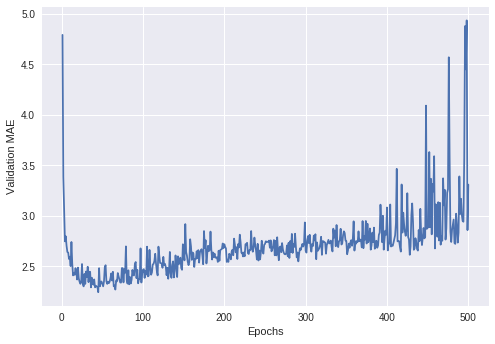

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+ 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 程式 3.31 排除前 10 個資料點, 繪製驗證分數

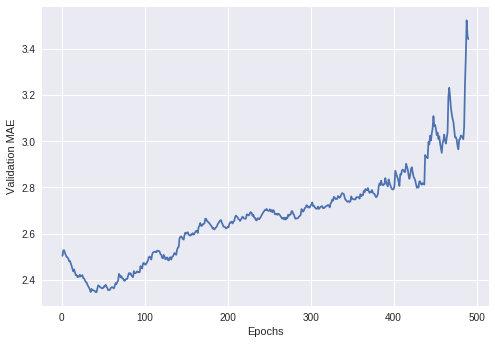

In [0]:
def smooth_curve(points, factor=0.9):  #指數值為 0.9
    smoothed_points = []
    for point in points:
        if smoothed_points:  #運用指數平均數
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point *(1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+ 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 程式 3.32 訓練最終模型

In [0]:
model = build_model()  #建立一個用最佳參數 compile 過的新模型
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)  #以整個資料進行訓練

102/102 [==============================] - 0s 3ms/step


In [0]:
test_mae_score

2.6776345851374606